In [1]:
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List
from math import log10, pow
import numpy as np

In [13]:
class Benchmark:
    def __init__(self, path_to_benchmark: str, first_line: int, last_line: int):
        self.N = []
        self.time = []
        self.GBs = []
        self.cgs_iterations = []
        self.cgs_time = []
        self.cgs_MUPDsit = []
        self.cgs_error = []
        
        with open(path_to_benchmark, "r") as bfile:
            self.lines = bfile.readlines();
        
        for index in range(first_line-1, last_line):
            line = self.lines[index]
            word = line.split(';')
            self.N.append(int(word[1]))
            self.time.append(float(word[6]))
            self.GBs.append(float(word[9]))
            self.cgs_iterations.append(int(word[12]))
            self.cgs_time.append(float(word[14]))
            self.cgs_MUPDsit.append(float(word[17]))
            self.cgs_error.append(float(word[20]))
            
class Benchmark_sellc:
    def __init__(self, path_to_benchmark: str, first_line: int, last_line: int):
        self.N = []
        self.transfer_host2device = []
        self.L2_error = []
        self.crs_time = []
        self.crs_GBs = []
        self.sellc_time = []
        self.sellc_GBs = []
        
        self.cgs_crs_iterations = []
        self.cgs_crs_time = []
        self.cgs_crs_MUPDsit = []
        self.cgs_crs_error = []
        
        self.cgs_sellc_iterations = []
        self.cgs_sellc_time = []
        self.cgs_sellc_MUPDsit = []
        self.cgs_sellc_error = []
        
        with open(path_to_benchmark, "r") as bfile:
            self.lines = bfile.readlines();
        
        for index in range(first_line-1, last_line):
            line = self.lines[index]
            word = line.split(';')
            self.N.append(int(word[1]))
            self.transfer_host2device.append(float(word[4]))
            self.L2_error.append(float(word[7]))
            self.crs_time.append(float(word[9]))
            self.crs_GBs.append(float(word[12]))
            self.sellc_time.append(float(word[15]))
            self.sellc_GBs.append(float(word[18]))
            
            self.cgs_crs_iterations.append(int(word[23]))
            self.cgs_crs_time.append(float(word[25]))
            self.cgs_crs_MUPDsit.append(float(word[28]))
            self.cgs_crs_error.append(float(word[31]))
            
            self.cgs_sellc_iterations.append(int(word[35]))
            self.cgs_sellc_time.append(float(word[37]))
            self.cgs_sellc_MUPDsit.append(float(word[40]))
            self.cgs_sellc_error.append(float(word[43]))

In [15]:
cpu_crs_float = Benchmark("fem_application_host_float.log", 1, 11)
cpu_crs_double = Benchmark("fem_application_host_double.log", 1, 11)

gpu_crs_float = Benchmark("fem_application_cuda_float.log", 1, 11)
gpu_crs_double = Benchmark("fem_application_cuda_double.log", 1, 11)

gpu_sellc_float = Benchmark_sellc("fem_application_cuda_sellc_float.log", 1, 6)
gpu_sellc_double = Benchmark_sellc("fem_application_cuda_sellc_double.log", 1, 5)

In [17]:
gpu_sellc_float.cgs_sellc_error

[1.98584e-05, 8.33368e-05, 0.000225836, 0.00018906, 0.000972845, 0.000866611]

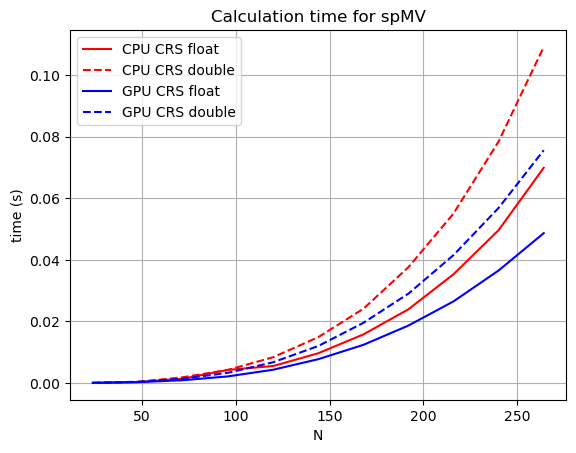

In [18]:
fig, ax = plt.subplots()
ax.plot(cpu_crs_float.N, cpu_crs_float.time, 'r', label = "CPU CRS float")
ax.plot(cpu_crs_double.N, cpu_crs_double.time, 'r--', label = "CPU CRS double")

ax.plot(gpu_crs_float.N, gpu_crs_float.time, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.time, 'b--', label = "GPU CRS double")

ax.set(xlabel = 'N', ylabel = 'time (s)', title = 'Calculation time for spMV')
ax.grid()
ax.legend()
plt.show()

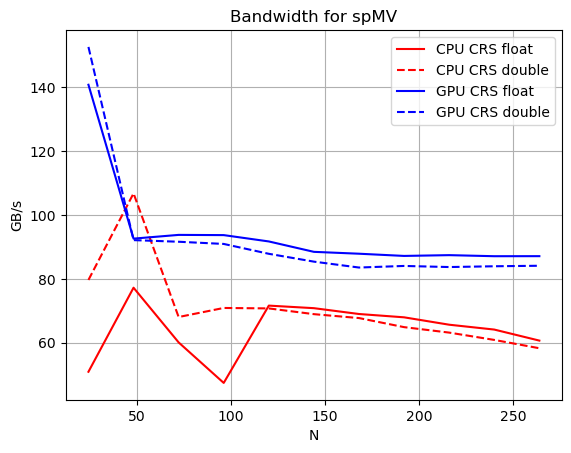

In [19]:
fig, ax = plt.subplots()
ax.plot(cpu_crs_float.N, cpu_crs_float.GBs, 'r', label = "CPU CRS float")
ax.plot(cpu_crs_double.N, cpu_crs_double.GBs, 'r--', label = "CPU CRS double")

ax.plot(gpu_crs_float.N, gpu_crs_float.GBs, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.GBs, 'b--', label = "GPU CRS double")

ax.set(xlabel = 'N', ylabel = 'GB/s', title = 'Bandwidth for spMV')
ax.grid()
ax.legend()

plt.show()

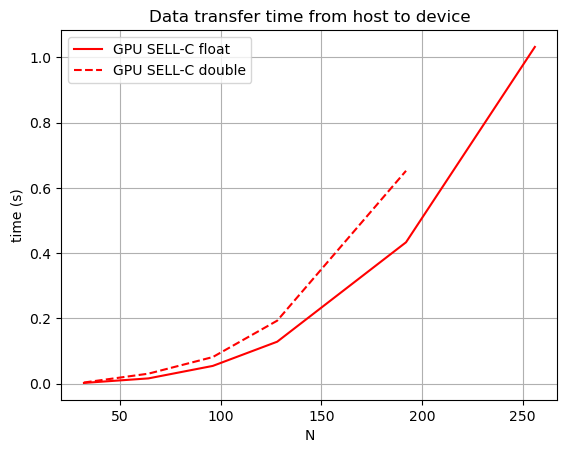

In [20]:
fig, ax = plt.subplots()
ax.plot(gpu_sellc_float.N, gpu_sellc_float.transfer_host2device, 'r', label = "GPU SELL-C float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.transfer_host2device, 'r--', label = "GPU SELL-C double")

ax.set(xlabel = 'N', ylabel = 'time (s)', title = 'Data transfer time from host to device')
ax.grid()
ax.legend()
plt.show()

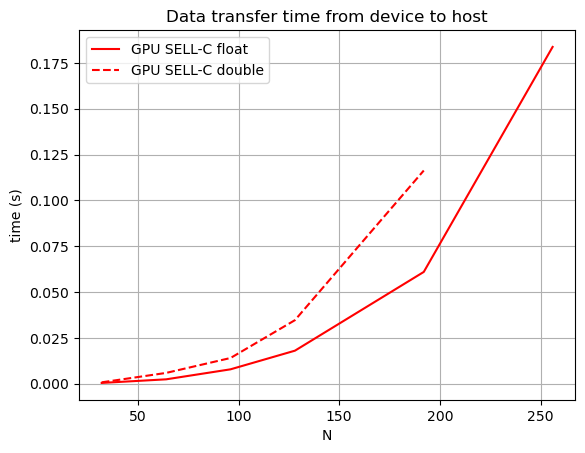

In [21]:
float_transferback = [0.00042703, 0.00238589, 0.00784605, 0.0180184, 0.0609721, 0.183703]
double_transferback = [0.000751185, 0.0058842, 0.0140215, 0.0346669, 0.116282]

fig, ax = plt.subplots()
ax.plot(gpu_sellc_float.N, float_transferback, 'r', label = "GPU SELL-C float")
ax.plot(gpu_sellc_double.N, double_transferback, 'r--', label = "GPU SELL-C double")
ax.set(xlabel = 'N', ylabel = 'time (s)', title = 'Data transfer time from device to host')
ax.grid()
ax.legend()
plt.show()

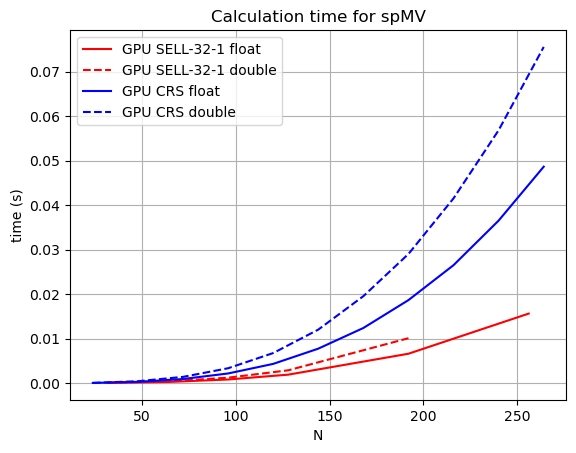

In [22]:
fig, ax = plt.subplots()
ax.plot(gpu_sellc_float.N, gpu_sellc_float.sellc_time, 'r', label = "GPU SELL-32-1 float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.sellc_time, 'r--', label = "GPU SELL-32-1 double")

ax.plot(gpu_crs_float.N, gpu_crs_float.time, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.time, 'b--', label = "GPU CRS double")

ax.set(xlabel = 'N', ylabel = 'time (s)', title = 'Calculation time for spMV')
ax.grid()
ax.legend()
plt.show()

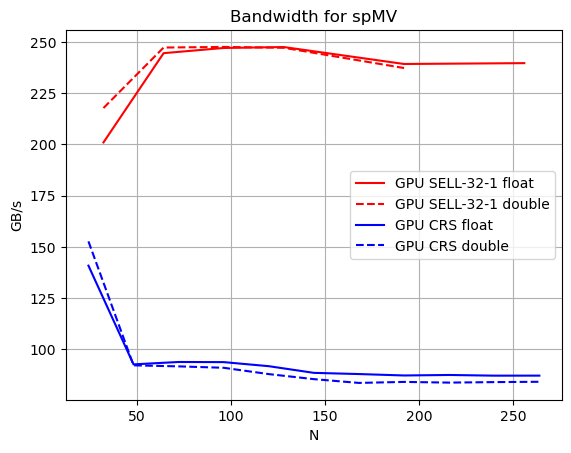

In [23]:
fig, ax = plt.subplots()
ax.plot(gpu_sellc_float.N, gpu_sellc_float.sellc_GBs, 'r', label = "GPU SELL-32-1 float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.sellc_GBs, 'r--', label = "GPU SELL-32-1 double")

ax.plot(gpu_crs_float.N, gpu_crs_float.GBs, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.GBs, 'b--', label = "GPU CRS double")

ax.set(xlabel = 'N', ylabel = 'GB/s', title = 'Bandwidth for spMV')
ax.grid()
ax.legend()

plt.show()

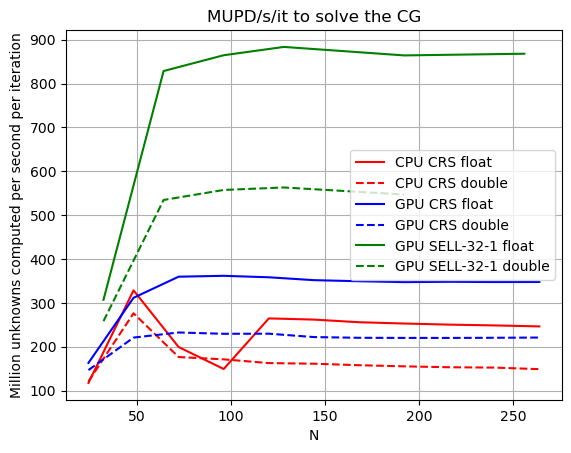

In [24]:
fig, ax = plt.subplots()

ax.plot(cpu_crs_float.N, cpu_crs_float.cgs_MUPDsit, 'r', label = "CPU CRS float")
ax.plot(cpu_crs_double.N, cpu_crs_double.cgs_MUPDsit, 'r--', label = "CPU CRS double")

ax.plot(gpu_crs_float.N, gpu_crs_float.cgs_MUPDsit, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.cgs_MUPDsit, 'b--', label = "GPU CRS double")

ax.plot(gpu_sellc_float.N, gpu_sellc_float.cgs_sellc_MUPDsit, 'g', label = "GPU SELL-32-1 float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.cgs_sellc_MUPDsit, 'g--', label = "GPU SELL-32-1 double")

ax.set(xlabel = 'N', ylabel = 'Million unknowns computed per second per iteration', title = 'MUPD/s/it to solve the CG')

ax.grid()
ax.legend()
plt.show()

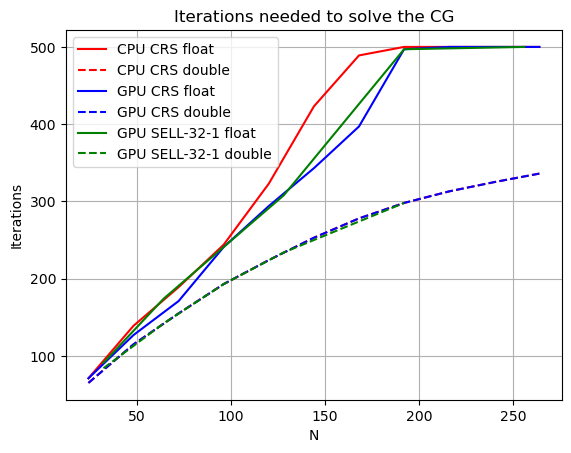

In [27]:
fig, ax = plt.subplots()

ax.plot(cpu_crs_float.N, cpu_crs_float.cgs_iterations, 'r', label = "CPU CRS float")
ax.plot(cpu_crs_double.N, cpu_crs_double.cgs_iterations, 'r--', label = "CPU CRS double")

ax.plot(gpu_crs_float.N, gpu_crs_float.cgs_iterations, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.cgs_iterations, 'b--', label = "GPU CRS double")

ax.plot(gpu_sellc_float.N, gpu_sellc_float.cgs_sellc_iterations, 'g', label = "GPU SELL-32-1 float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.cgs_sellc_iterations, 'g--', label = "GPU SELL-32-1 double")

ax.set(xlabel = 'N', ylabel = 'Iterations', title = 'Iterations needed to solve the CG')

ax.grid()
ax.legend()
plt.show()

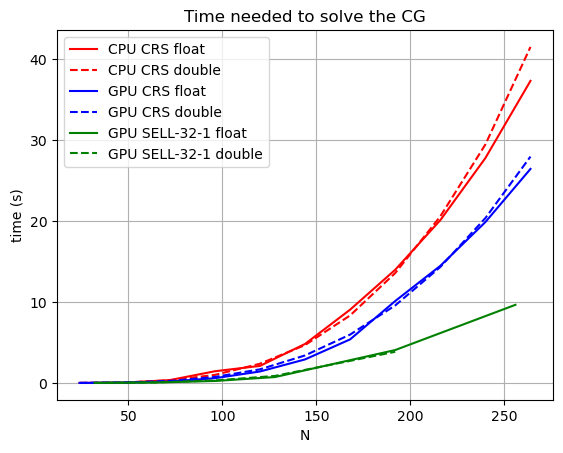

In [28]:
fig, ax = plt.subplots()

ax.plot(cpu_crs_float.N, cpu_crs_float.cgs_time, 'r', label = "CPU CRS float")
ax.plot(cpu_crs_double.N, cpu_crs_double.cgs_time, 'r--', label = "CPU CRS double")

ax.plot(gpu_crs_float.N, gpu_crs_float.cgs_time, 'b', label = "GPU CRS float")
ax.plot(gpu_crs_double.N, gpu_crs_double.cgs_time, 'b--', label = "GPU CRS double")

ax.plot(gpu_sellc_float.N, gpu_sellc_float.cgs_sellc_time, 'g', label = "GPU SELL-32-1 float")
ax.plot(gpu_sellc_double.N, gpu_sellc_double.cgs_sellc_time, 'g--', label = "GPU SELL-32-1 double")

ax.set(xlabel = 'N', ylabel = 'time (s)', title = 'Time needed to solve the CG')

ax.grid()
ax.legend()
plt.show()